In [ ]:
# jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

In [ ]:
!pip3 install tensorflow

^C


In [ ]:
!pip3 install scipy

In [ ]:
!pip3 install scipy numpy

In [ ]:
#importing main libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Tensorflow version %s" %tf.__version__)
print("tf.Keras version %s" %tf.keras.__version__)

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

Tensorflow version 2.11.0
tf.Keras version 2.11.0


In [ ]:
#import electronics componenets dataset

import os
#from google.colab import drive
# drive.mount('/content/drive')

# datadir = '/content/drive/MyDrive/hw2_dset/images'
datadir = '/Users/pc/Desktop/images'
trainingset = datadir+'/train/'
testset = datadir + '/test/'

batch_size = 32
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,\
    zoom_range=0.1,\
    rotation_range=10,\
    width_shift_range=0.1,\
    height_shift_range=0.1,\
    horizontal_flip=True,\
    vertical_flip=False)

train_generator = train_datagen.flow_from_directory(
    directory=trainingset,
    target_size=(128, 256), #118,224
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True)

test_datagen = ImageDataGenerator(
    rescale = 1. / 255)

test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(128, 256),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

num_samples = train_generator.n
num_classes = train_generator.num_classes
input_shape = train_generator.image_shape

classnames = [k for k,v in train_generator.class_indices.items()]

print("Image input %s" %str(input_shape))
print("Classes: %r" %classnames)

print('Loaded %d training samples from %d classes.' %(num_samples,num_classes))
print('Loaded %d test samples from %d classes.' %(test_generator.n,test_generator.num_classes))


Found 6544 images belonging to 24 classes.
Found 2429 images belonging to 24 classes.
Image input (128, 256, 3)
Classes: ['Bypass-capacitor', 'Electrolytic-capacitor', 'Integrated-micro-circuit', 'LED', 'PNP-transistor', 'armature', 'attenuator', 'cartridge-fuse', 'clip-lead', 'electric-relay', 'filament', 'heat-sink', 'jumper-cable', 'junction-transistor', 'memory-chip', 'microchip', 'microprocessor', 'potential-divider', 'potentiometer', 'relay', 'semi-conductor', 'semiconductor-diode', 'solenoid', 'step-down-transformer']
Loaded 6544 training samples from 24 classes.
Loaded 2429 test samples from 24 classes.


Bypass-capacitor


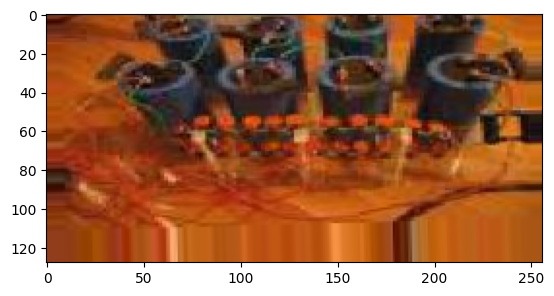

microprocessor


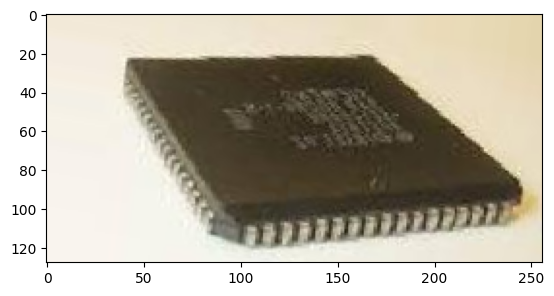

junction-transistor


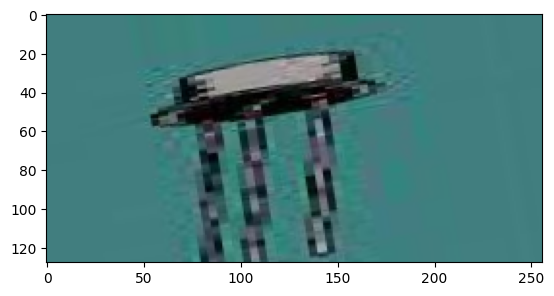

potential-divider


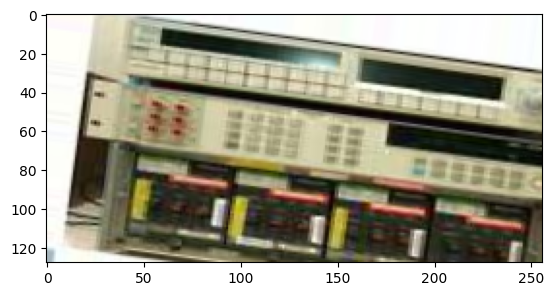

potentiometer


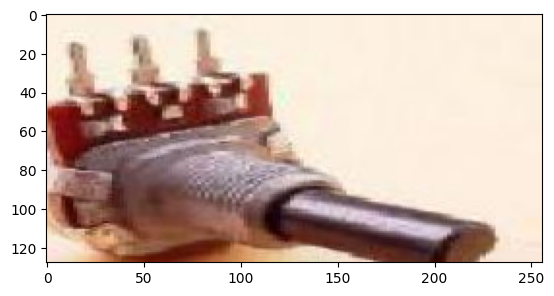

In [ ]:
#show some random images

import matplotlib.pyplot as plt

n = 5
x,y = train_generator.next()
# x,y size is train_generator.batch_size

for i in range(0,n):
    image = x[i]
    label = y[i].argmax()  # categorical from one-hot-encoding
    print(classnames[label])
    plt.imshow(image)
    plt.show()

In [ ]:
#Alexnet model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
                         Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

def AlexNet(input_shape, num_classes, regl2 = 0.0001, lr=0.0001):

    model = Sequential()

    # C1 Convolutional Layer 
    model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11),\
                     strides=(2,4), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())

    # C2 Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C3 Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C4 Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C5 Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Flatten
    model.add(Flatten())

    flatten_shape = (input_shape[0]*input_shape[1]*input_shape[2],)
    
    # D1 Dense Layer
    model.add(Dense(4096, input_shape=flatten_shape, kernel_regularizer=regularizers.l2(regl2)))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # D2 Dense Layer
    model.add(Dense(4096, kernel_regularizer=regularizers.l2(regl2)))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # D3 Dense Layer
    model.add(Dense(1000,kernel_regularizer=regularizers.l2(regl2)))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # Compile

    adam = optimizers.Adam(learning_rate=lr)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model
 
# create the model
model = AlexNet(input_shape,num_classes)
model.summary()

# history of results (set to None when initializing a new mdoel)
history = None


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 59, 62, 96)        34944     
                                                                 
 activation (Activation)     (None, 59, 62, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 31, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 29, 31, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 21, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 19, 21, 256)       0

In [ ]:
#load trained model

import os
import pickle
from tensorflow.keras.models import load_model

models_dir = datadir + '/models/'
loadepochs = 50
modelname = 'electronics model, epoch 25'

def loadmodel(problem):
    filename = os.path.join(models_dir, '%s.h5' %problem)
    try:
        model = load_model(filename)
        print("\nModel loaded successfully from file %s\n" %filename)
    except OSError:    
        print("\nModel file %s not found!!!\n" %filename)
        model = None
    filename = os.path.join(models_dir, '%s_history.pkl' %problem)
    try:
        history = pickle.load(open(filename, "rb"))
        print("History loaded successfully from file %s\n" %filename)
    except OSError as e:
        print(e)
        print("History file %s not found!!!\n" %filename)
        history = None
    return model, history

model, history = loadmodel(modelname)

In [ ]:
#train
import os
import pickle
from tensorflow.keras.models import load_model

steps_per_epoch=train_generator.n//train_generator.batch_size
val_steps=test_generator.n//test_generator.batch_size+1

epochs = 50  # sets number of epochs

try:
    h = model.fit(train_generator, epochs=epochs, verbose=1,\
                    steps_per_epoch=steps_per_epoch,\
                    validation_data=test_generator,\
                    validation_steps=val_steps)
except KeyboardInterrupt:
    pass

# append current history

if history is None:
    history = h.history
else:
    history['loss'].extend(h.history['loss'])
    history['accuracy'].extend(h.history['accuracy'])
    history['val_loss'].extend(h.history['val_loss'])
    history['val_accuracy'].extend(h.history['val_accuracy'])

Epoch 1/50
204/204 [==============================] - 238s 1s/step - loss: 1.0124 - accuracy: 0.7781 - val_loss: 4.1821 - val_accuracy: 0.3112
Epoch 2/50
204/204 [==============================] - 241s 1s/step - loss: 1.0261 - accuracy: 0.7810 - val_loss: 4.1074 - val_accuracy: 0.3018
Epoch 3/50
204/204 [==============================] - 249s 1s/step - loss: 1.0450 - accuracy: 0.7703 - val_loss: 4.1173 - val_accuracy: 0.3034
Epoch 4/50
204/204 [==============================] - 245s 1s/step - loss: 1.0216 - accuracy: 0.7749 - val_loss: 4.0349 - val_accuracy: 0.3018
Epoch 5/50
204/204 [==============================] - 238s 1s/step - loss: 1.0107 - accuracy: 0.7767 - val_loss: 4.1922 - val_accuracy: 0.2972
Epoch 6/50
204/204 [==============================] - 233s 1s/step - loss: 1.0116 - accuracy: 0.7827 - val_loss: 4.2639 - val_accuracy: 0.2935
Epoch 7/50
204/204 [==============================] - 234s 1s/step - loss: 1.0236 - accuracy: 0.7726 - val_loss: 4.7112 - val_accuracy: 0.2651

In [ ]:
#save model

import os
import pickle

models_dir = datadir + '/models/'
modelname = 'electronics model, epoch 150_200'

def savemodel(problem,model,history):
    filename = os.path.join(models_dir, '%s.h5' %problem)
    model.save(filename)
    print("\nModel saved successfully on file %s\n" %filename)
    filename = os.path.join(models_dir, '%s_history.pkl' %problem)
    with open(filename, 'wb') as f:
        pickle.dump(history, f)
    print("History saved successfully on file %s\n" %filename)

# Save model and history
savemodel(modelname,model,history)


Model saved successfully on file /Users/pc/Desktop/images/models/electronics model, epoch 150_200.h5

History saved successfully on file /Users/pc/Desktop/images/models/electronics model, epoch 150_200_history.pkl



In [ ]:
#test model

test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(128, 256),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)
val_steps=test_generator.n//test_generator.batch_size+1
loss, acc = model.evaluate(test_generator,verbose=1,steps=val_steps)
print('Test loss: %f' %loss)
print('Test accuracy: %f' %acc)


Found 2429 images belonging to 24 classes.
76/76 [==============================] - 11s 148ms/step - loss: 4.7956 - accuracy: 0.2602
Test loss: 4.795582
Test accuracy: 0.260189


In [ ]:
#f score, recall, precision

import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

val_steps=test_generator.n//test_generator.batch_size+1

test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(128, 256),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

preds = model.predict(test_generator,verbose=1,steps=val_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = test_generator.classes  # shuffle=False in test_generator

print(classification_report(Ytest, Ypred, labels=None, target_names=classnames, digits=3))




Found 2429 images belonging to 24 classes.
76/76 [==============================] - 12s 152ms/step
                          precision    recall  f1-score   support

        Bypass-capacitor      0.204     0.122     0.153        82
  Electrolytic-capacitor      0.347     0.170     0.228       100
Integrated-micro-circuit      0.202     0.276     0.233       134
                     LED      0.442     0.461     0.451       115
          PNP-transistor      0.382     0.255     0.306       102
                armature      0.548     0.168     0.258       101
              attenuator      0.308     0.262     0.283        61
          cartridge-fuse      0.774     0.369     0.500        65
               clip-lead      0.348     0.500     0.411        78
          electric-relay      0.188     0.029     0.050       105
                filament      0.643     0.630     0.636       100
               heat-sink      0.176     0.330     0.229       100
            jumper-cable      0.246     0.

In [ ]:
#confusion matrix

import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

val_steps=test_generator.n//test_generator.batch_size+1

test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(128, 256),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

preds = model.predict_generator(test_generator,verbose=1,steps=val_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = test_generator.classes  # shuffle=False in test_generator

cm = confusion_matrix(Ytest, Ypred)

conf = [] # data structure for confusions: list of (i,j,cm[i][j])
for i in range(0,cm.shape[0]):
  for j in range(0,cm.shape[1]):
    if (i!=j and cm[i][j]>0):
      conf.append([i,j,cm[i][j]])

col=2
conf = np.array(conf)
conf = conf[np.argsort(-conf[:,col])]  # decreasing order by 3-rd column (i.e., cm[i][j])

print('%-16s     %-16s  \t%s \t%s ' %('True','Predicted','errors','err %'))
print('------------------------------------------------------------------')
for k in conf:
  print('%-16s ->  %-16s  \t%d \t%.2f %% ' %(classnames[k[0]],classnames[k[1]],k[2],k[2]*100.0/test_generator.n))
  

Found 2429 images belonging to 24 classes.


C:\Users\pc\AppData\Local\Temp\ipykernel_14480\3656948892.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator,verbose=1,steps=val_steps)


76/76 [==============================] - 13s 164ms/step
True                 Predicted         	errors 	err % 
------------------------------------------------------------------
semi-conductor   ->  Integrated-micro-circuit  	32 	1.32 % 
microchip        ->  microprocessor    	31 	1.28 % 
microprocessor   ->  microchip         	30 	1.24 % 
Integrated-micro-circuit ->  microchip         	28 	1.15 % 
Integrated-micro-circuit ->  microprocessor    	25 	1.03 % 
clip-lead        ->  jumper-cable      	21 	0.86 % 
relay            ->  heat-sink         	20 	0.82 % 
potentiometer    ->  semiconductor-diode  	19 	0.78 % 
electric-relay   ->  relay             	19 	0.78 % 
jumper-cable     ->  clip-lead         	19 	0.78 % 
memory-chip      ->  microprocessor    	18 	0.74 % 
electric-relay   ->  heat-sink         	18 	0.74 % 
PNP-transistor   ->  junction-transistor  	18 	0.74 % 
memory-chip      ->  microchip         	18 	0.74 % 
relay            ->  microprocessor    	17 	0.70 % 
junction-tra

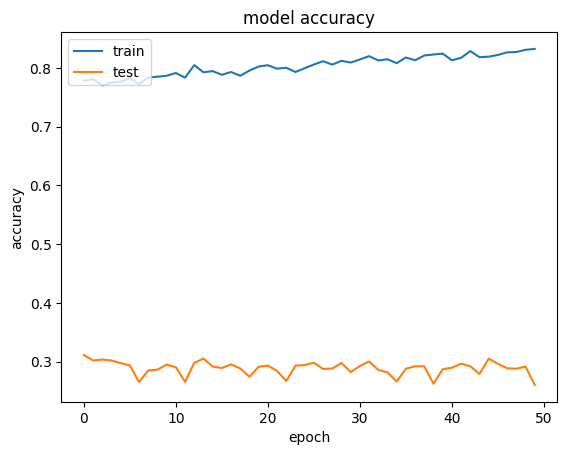

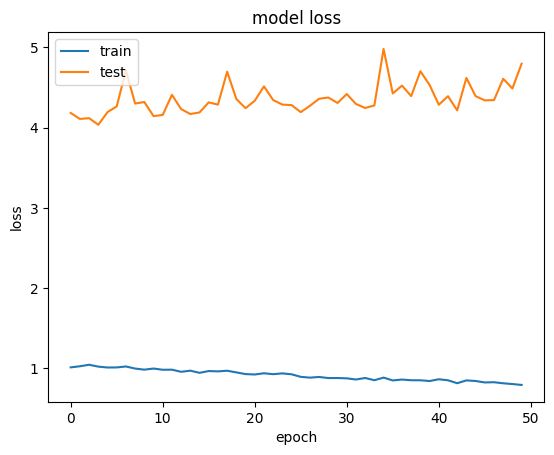

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# VGG16 and TransferNet start from here

In [ ]:
!pip install tensorflow_datasets

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
# For working with neural networks
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Flatten,\
                         Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D,\
                         UpSampling2D, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks

import matplotlib.pyplot as plt
import pickle 

print("Tensorflow version %s" %tf.__version__)

device_name = tf.test.gpu_device_name()
print('Found GPU at: {}'.format(device_name))

Tensorflow version 2.11.0
Found GPU at: 


In [ ]:
#import electronics componenets dataset

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datadir = '/Users/pc/Desktop/ARGOS'
trainingset = datadir+'/train/'
testset = datadir + '/test/'
models_dir = datadir + '/models/'
results_dir = datadir + '/results/'

def savemodel(model,problem):
    filename = os.path.join(models_dir, '%s.h5' %problem)
    model.save(filename)
    print("\nModel saved on file %s\n" %filename)

def savehistory(history,problem):
    filename = os.path.join(results_dir, '%s.hist' %problem)
    with open(filename, 'wb') as f:
        pickle.dump(history.history, f, pickle.HIGHEST_PROTOCOL)
    print("\nHistory saved on file %s\n" %filename)

def loadhistory(problem):
    filename = os.path.join(results_dir, '%s.hist' %problem)
    with open(filename, 'rb') as f:
        history = pickle.load(f)
    print("\nHistory loaded from file %s\n" %filename)
    return history


# level of data augmentation [0: none, 1: low, 2: high ]
data_augmentation_level = 2

batch_size = 64
input_shape = ()

if data_augmentation_level==0:

    train_datagen = ImageDataGenerator(
        rescale = 1. / 255)
    train_shuffle = False

elif data_augmentation_level==1:

    train_datagen = ImageDataGenerator(
        rescale = 1. / 255,\
        zoom_range=0.1,\
        rotation_range=10)
    train_shuffle = False

else:    
    train_datagen = ImageDataGenerator(
        rescale = 1. / 255,\
        zoom_range=0.1,\
        rotation_range=20,\
        width_shift_range=0.1,\
        height_shift_range=0.1,\
        horizontal_flip=True,\
        vertical_flip=False)
    train_shuffle = True

train_generator = train_datagen.flow_from_directory(
    directory=trainingset,
    target_size=(128, 256),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=train_shuffle)

test_datagen = ImageDataGenerator(
    rescale = 1. / 255)

test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(128, 256),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False)

num_samples = train_generator.n
num_classes = train_generator.num_classes
input_shape = train_generator.image_shape

classnames = [k for k,v in train_generator.class_indices.items()]

print("Image input %s" %str(input_shape))
print("Classes: %r" %classnames)

print('Loaded %d training samples from %d classes.' %(num_samples,num_classes))
print('Loaded %d test samples from %d classes.' %(test_generator.n,test_generator.num_classes))

print('Data augmentation level: %d' %(data_augmentation_level))


Found 6544 images belonging to 24 classes.
Found 2429 images belonging to 24 classes.
Image input (128, 256, 3)
Classes: ['Bypass-capacitor', 'Electrolytic-capacitor', 'Integrated-micro-circuit', 'LED', 'PNP-transistor', 'armature', 'attenuator', 'cartridge-fuse', 'clip-lead', 'electric-relay', 'filament', 'heat-sink', 'jumper-cable', 'junction-transistor', 'memory-chip', 'microchip', 'microprocessor', 'potential-divider', 'potentiometer', 'relay', 'semi-conductor', 'semiconductor-diode', 'solenoid', 'step-down-transformer']
Loaded 6544 training samples from 24 classes.
Loaded 2429 test samples from 24 classes.
Data augmentation level: 2


In [ ]:
# Load VGG16 model 
# init_weights='imagenet' if you want to use the pretrained model
def load_vgg16_features(input_shape, init_weights=None):
    
    # define input tensor
    input0 = Input(shape=input_shape)

    # load VGG16 model (possibly pretrained model on imagenet) without the final dense layers (include_top=False)
    vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights=init_weights, input_tensor=input0)
    
    feature_extractor = tf.keras.models.Model(inputs=input0, outputs=vgg16_model.output, name="vgg16_features")

    optimizer = 'adam' #alternative 'sgd'

    feature_extractor.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return feature_extractor

vgg16feat_model = load_vgg16_features(input_shape)
vgg16feat_model.summary()


Model: "vgg16_features"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 128, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 128, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 128, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 64, 128)    

In [ ]:
def transferNet(input_shape, num_classes, output_layer_name, trainable_layers):
    
    # load the pre-trained model
    feature_extractor = load_vgg16_features(input_shape, init_weights='imagenet')

    # get the original input layer tensor
    input_t = feature_extractor.get_layer(index=0).input

    # set the feture extractor layers as non-trainable
    for idx,layer in enumerate(feature_extractor.layers):
      if layer.name in trainable_layers:
        layer.trainable = True
      else:
        layer.trainable = False

    # get the output tensor from a layer of the feature extractor
    output_extractor = feature_extractor.get_layer(name = output_layer_name).output
    
    #output_extractor = MaxPooling2D(pool_size=(4,4))(output_extractor)

    # flat the output of a Conv layer
    flatten = Flatten()(output_extractor) 
    flatten_norm = BatchNormalization()(flatten)

    # add a Dense layer
    dense1 = Dropout(0.4)(flatten_norm)
    dense1 = Dense(200, activation='relu')(dense1)
    dense1 = BatchNormalization()(dense1)
    
    # add a Dense layer
    dense2 = Dropout(0.4)(dense1)
    dense2 = Dense(100, activation='relu')(dense2)
    dense2 = BatchNormalization()(dense2)

    # add the final output layer
    dense3 = BatchNormalization()(dense2)
    dense3 = Dense(num_classes, activation='softmax')(dense3)
    
    model = tf.keras.models.Model(inputs=input_t, outputs=dense3, name="transferNet")
    
    optimizer = 'adam' #alternative 'SGD'
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return model



# choose the layer from which you can get the features (block5_pool the end, glob_pooling to get the pooled version of the output)
name_output_extractor = "block5_pool"
trainable_layers = ["block5_conv3"]

# build the transfer model
transfer_model = transferNet(input_shape, num_classes, name_output_extractor, trainable_layers)
transfer_model.summary()

Model: "transferNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 128, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 128, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 128, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 64, 128)       

In [ ]:
#load model

import os
import pickle
from tensorflow.keras.models import load_model

models_dir = datadir + '/models/'
loadepochs = 50
modelname = 'VGG16-transfer-ARGOS-10ep_NEW'

def loadmodel(problem):
    filename = os.path.join(models_dir, '%s.h5' %problem)
    try:
        model = load_model(filename)
        print("\nModel loaded successfully from file %s\n" %filename)
    except OSError:    
        print("\nModel file %s not found!!!\n" %filename)
        model = None
    filename = os.path.join(models_dir, '%s_history.pkl' %problem)
    try:
        history = pickle.load(open(filename, "rb"))
        print("History loaded successfully from file %s\n" %filename)
    except OSError as e:
        print(e)
        print("History file %s not found!!!\n" %filename)
        history = None
    return model, history

model, history = loadmodel(modelname)


Model loaded successfully from file /Users/pc/Desktop/ARGOS/models/VGG16-transfer-ARGOS-10ep_NEW.h5

[Errno 2] No such file or directory: '/Users/pc/Desktop/ARGOS/models/VGG16-transfer-ARGOS-10ep_NEW_history.pkl'
History file /Users/pc/Desktop/ARGOS/models/VGG16-transfer-ARGOS-10ep_NEW_history.pkl not found!!!



In [ ]:
# fit the transferNet on the training data
stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

steps_per_epoch = train_generator.n//train_generator.batch_size
val_steps = test_generator.n//test_generator.batch_size+1

epochs = 25
try:
    transfer_history = transfer_model.fit(train_generator, epochs=epochs, verbose=1, callbacks=[stopping],\
                    steps_per_epoch=steps_per_epoch,\
                    validation_data=test_generator,\
                    validation_steps=val_steps)
except KeyboardInterrupt:
    pass


# Save trained model and hystory
problemname = 'VGG16-transfer-ARGOS'
savemodel(transfer_model,problemname)
savehistory(transfer_history,problemname)

Epoch 1/25
102/102 [==============================] - 301s 3s/step - loss: 2.6973 - accuracy: 0.2153 - val_loss: 2.7065 - val_accuracy: 0.2437
Epoch 2/25
102/102 [==============================] - 301s 3s/step - loss: 2.2879 - accuracy: 0.2929 - val_loss: 2.1315 - val_accuracy: 0.3326
Epoch 3/25
102/102 [==============================] - 302s 3s/step - loss: 2.1270 - accuracy: 0.3373 - val_loss: 2.1071 - val_accuracy: 0.3434
Epoch 4/25
102/102 [==============================] - 296s 3s/step - loss: 2.0215 - accuracy: 0.3728 - val_loss: 1.9785 - val_accuracy: 0.3775
Epoch 5/25
102/102 [==============================] - 297s 3s/step - loss: 1.9407 - accuracy: 0.3830 - val_loss: 1.9284 - val_accuracy: 0.3866
Epoch 6/25
102/102 [==============================] - 295s 3s/step - loss: 1.8802 - accuracy: 0.4002 - val_loss: 1.9845 - val_accuracy: 0.3829
Epoch 7/25
102/102 [==============================] - 295s 3s/step - loss: 1.8281 - accuracy: 0.4162 - val_loss: 1.9894 - val_accuracy: 0.3746


History loaded from file /Users/pc/Desktop/ARGOS/results/VGG16-transfer-ARGOS-SGD.hist



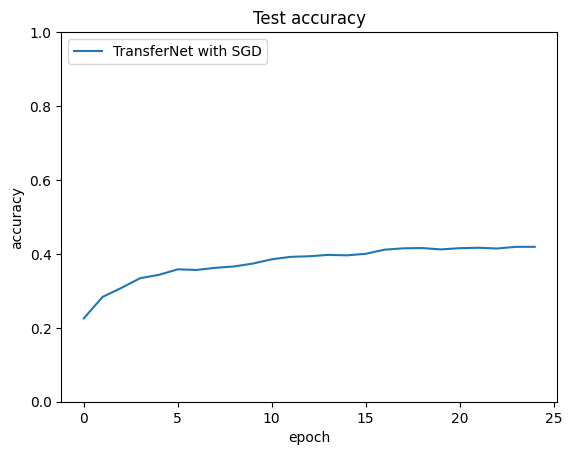

In [ ]:
import matplotlib.pyplot as plt

def plot_results(histories,legend):

    plt.title('Test accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.ylim(0,1.0)
    for h in histories:
        plt.plot(h)
    plt.legend(legend, loc='upper left')
    plt.show()



transfer_history = loadhistory('VGG16-transfer-ARGOS-SGD')

legend = ["TransferNet with SGD"]
histories = [transfer_history['val_accuracy']]
plot_results(histories,legend)
